In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pmdarima as pm

In [9]:
# setting up our y variables
btc = pd.read_csv('BTC-USD.csv').set_index('time')
eth = pd.read_csv('ETH-USD.csv').set_index('time')
dash = pd.read_csv('DASH-USD.csv').set_index('time')
ltc = pd.read_csv('LTC-USD.csv').set_index('time')
monero = pd.read_csv('Monero.csv').set_index('time').loc['2020-01-02':'2021-03-05']
nem = pd.read_csv('NEM.csv').set_index('time').loc['2020-01-02':'2021-03-05']
stl = pd.read_csv('Stellar.csv').set_index('time').loc['2020-01-02':'2021-03-05']
teth = pd.read_csv('Tether.csv').set_index('time').loc['2020-01-02':'2021-03-05']
xrp = pd.read_csv('xrp.csv').set_index('time').loc['2020-01-02':'2021-03-05']

# indices
kbw = pd.read_csv("KFTX - Sheet1.csv").set_index('Date')
ai = pd.read_csv("Nasdaq CTA Artificial Intelligence & Robotics Historical Data.csv").set_index('Date')

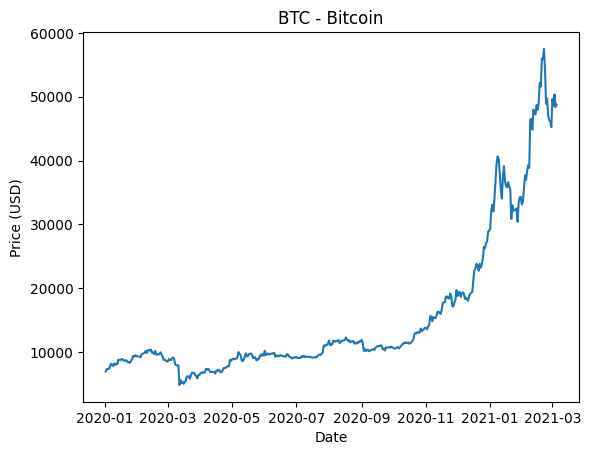

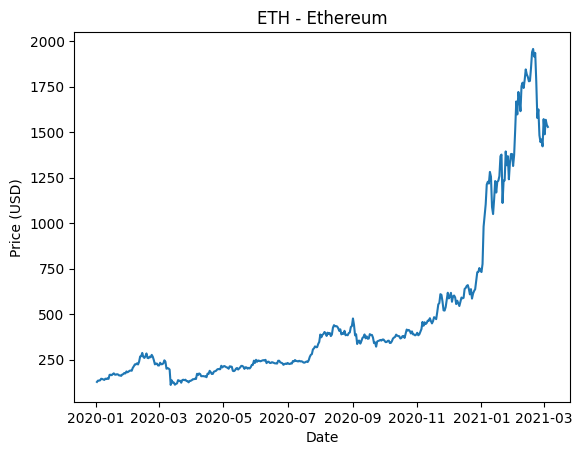

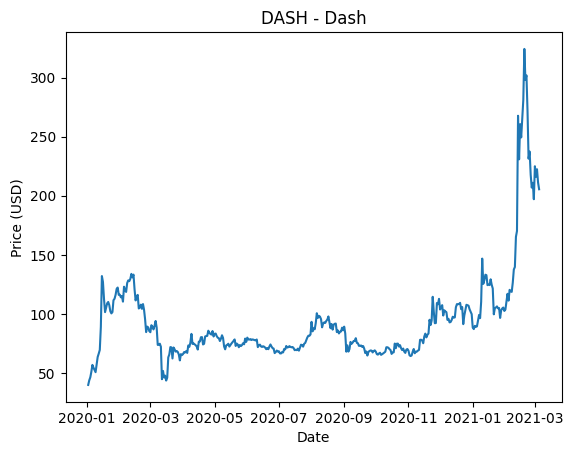

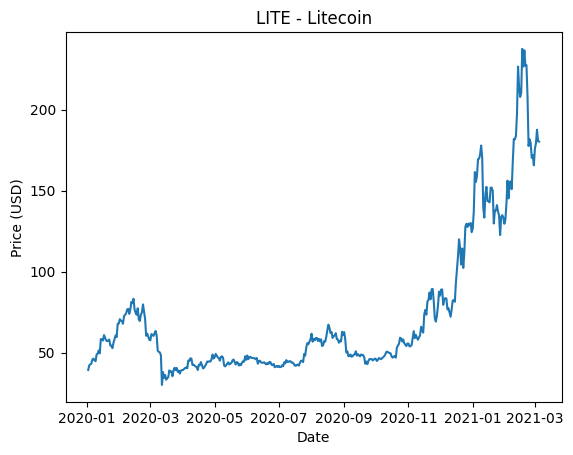

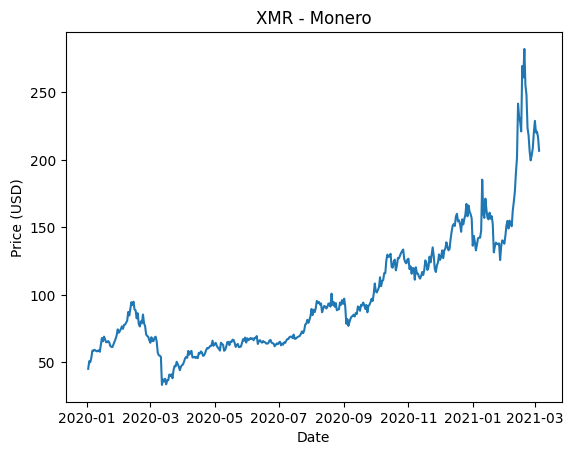

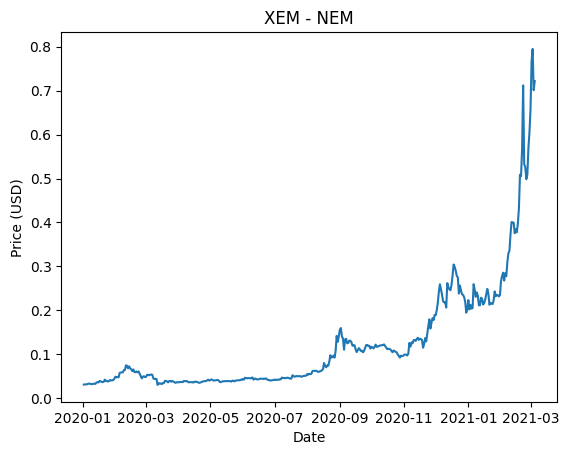

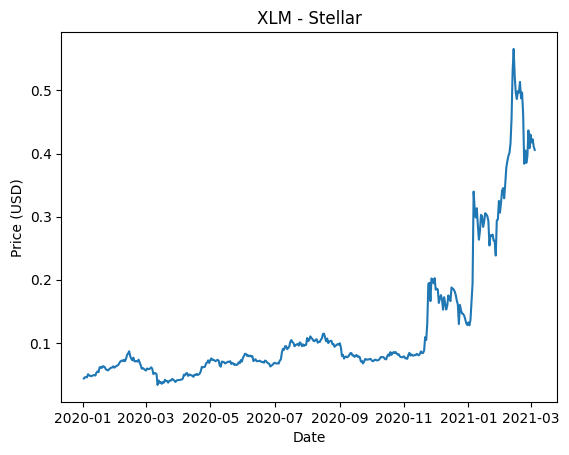

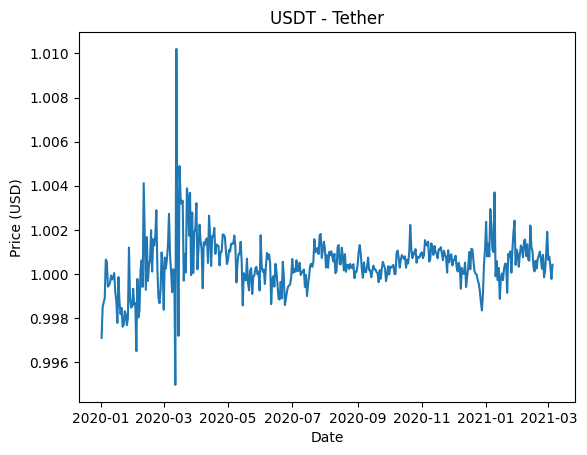

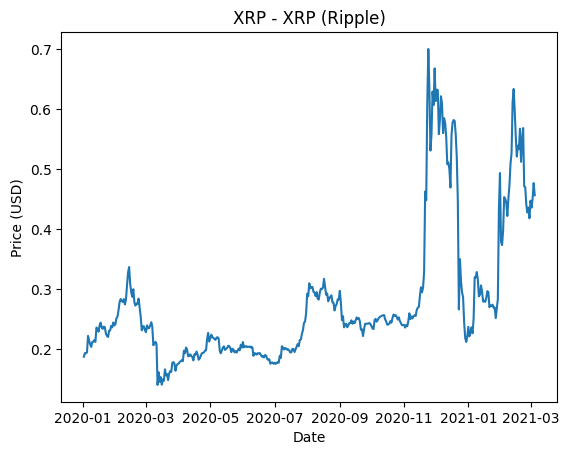

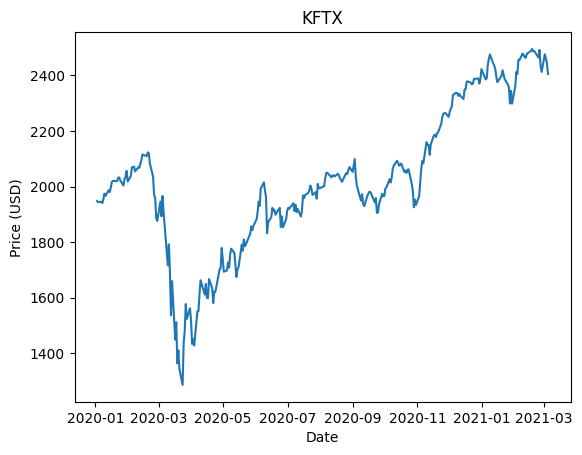

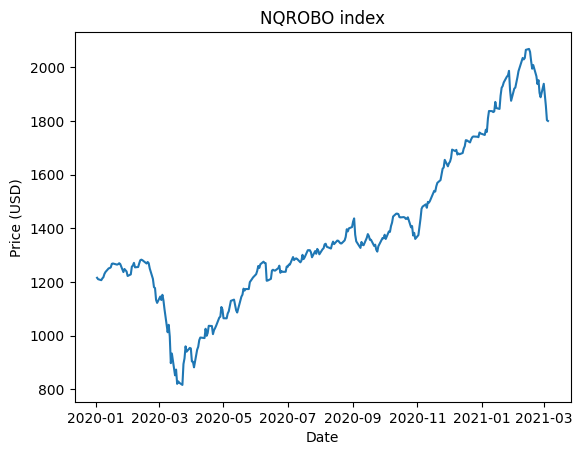

In [10]:
dfs_coinbase = [
    btc, 
    eth, 
    dash,
    ltc
]

dfs_coinmetrics = [
    monero,
    nem,
    stl,
    teth,
    xrp
]

indices = [kbw, ai]

ticks_coinbase = [
    ('BTC', 'Bitcoin'),
    ('ETH', 'Ethereum'),
    ('DASH', 'Dash'),
    ('LITE', 'Litecoin'),
]

ticks_coinmetrics = [
    ('XMR', 'Monero'),
    ('XEM', 'NEM'),
    ('XLM', 'Stellar'),
    ('USDT', 'Tether'),
    ('XRP', 'XRP (Ripple)')
]

for i in range(len(dfs_coinbase)):
    dfs_coinbase[i].index = pd.to_datetime(dfs_coinbase[i].index)
    plt.plot(dfs_coinbase[i].index, dfs_coinbase[i]['close'])
    plt.title(f'{ticks_coinbase[i][0]} - {ticks_coinbase[i][1]}')
    plt.ylabel('Price (USD)')
    plt.xlabel('Date')
    plt.show()


for i in range(len(dfs_coinmetrics)):
    dfs_coinmetrics[i].index = pd.to_datetime(dfs_coinmetrics[i].index)
    dfs_coinmetrics[i] = dfs_coinmetrics[i]
    plt.plot(dfs_coinmetrics[i].index, dfs_coinmetrics[i]['PriceUSD'])
    plt.title(f'{ticks_coinmetrics[i][0]} - {ticks_coinmetrics[i][1]}')
    plt.ylabel('Price (USD)')
    plt.xlabel('Date')
    plt.show()

kbw.index = pd.to_datetime(kbw.index)
plt.plot(kbw.index, kbw['Close'])
plt.title('KFTX')
plt.ylabel('Price (USD)')
plt.xlabel('Date')
plt.show()

ai.index = pd.to_datetime(ai.index)
ai = ai.sort_index()
ai = ai.loc['2020-01-02':'2021-03-05']
ai['Price'] = ai['Price'].map(lambda x: float(x.replace(',', '')))
plt.plot(ai.index, ai['Price'])
plt.title('NQROBO index')
plt.ylabel('Price (USD)')
plt.xlabel('Date')
plt.show()

In [11]:
ai

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2020-01-02,1216.04,"1,216.04","1,216.05","1,201.28",NaN,1.12%
2020-01-03,1210.77,"1,215.27","1,215.54","1,203.27",NaN,-0.43%
2020-01-06,1207.13,"1,207.09","1,207.39","1,199.48",NaN,-0.30%
2020-01-07,1213.71,"1,211.10","1,216.56","1,208.53",NaN,0.55%
2020-01-08,1218.21,"1,211.30","1,220.74","1,208.89",NaN,0.37%
...,...,...,...,...,...,...
2021-03-01,1939.08,"1,891.54","1,939.36","1,889.77",NaN,2.66%
2021-03-02,1898.74,"1,934.69","1,944.24","1,898.63",NaN,-2.08%
2021-03-03,1856.50,"1,898.43","1,905.35","1,855.49",NaN,-2.22%


In [12]:
btc = btc[['close']].rename(columns={'close': 'BTC'})
eth = eth[['close']].rename(columns={'close': 'ETH'})
dash = dash[['close']].rename(columns={'close': 'DASH'})
ltc = ltc[['close']].rename(columns={'close': 'LTC'})
monero = monero[['PriceUSD']].rename(columns={'PriceUSD': 'MONE'})
nem = nem[['PriceUSD']].rename(columns={'PriceUSD': 'NEM'})
stl = stl[['PriceUSD']].rename(columns={'PriceUSD': 'STL'})
teth = teth[['PriceUSD']].rename(columns={'PriceUSD': 'TETH'})
xrp = xrp[['PriceUSD']].rename(columns={'PriceUSD': 'XRP'})
kbw = kbw.rename(columns = {'Close' : 'KFTX'})
kbw.index = kbw.index.date
ai = ai[['Price']].rename(columns = {'Price': "NQROBO"})

y = btc.join(eth)
y = y.join(dash)
y = y.join(ltc)
y = y.join(monero)
y = y.join(nem)
y = y.join(stl)
y = y.join(teth)
y = y.join(xrp)
y = y.join(kbw)
y = y.join(ai)

In [13]:
y

,BTC,ETH,DASH,LTC,MONE,NEM,STL,TETH,XRP,KFTX,NQROBO
time,,,,,,,,,,,
2020-01-02,6945.02,126.81,39.831,39.32,45.346340,0.031464,0.043496,0.997102,0.186873,1948.09,1216.04
2020-01-03,7334.45,134.17,43.704,42.20,50.953141,0.031761,0.045479,0.998474,0.192843,1943.87,1210.77
2020-01-04,7348.63,134.14,46.285,42.73,50.195717,0.031795,0.045577,0.998718,0.192610,NaN,NaN
2020-01-05,7355.40,135.31,51.006,43.28,53.567840,0.032070,0.045368,0.998903,0.194187,NaN,NaN
2020-01-06,7764.63,144.19,56.793,45.79,58.899935,0.033162,0.050222,1.000653,0.221597,1945.21,1207.13
...,...,...,...,...,...,...,...,...,...,...,...
2021-03-01,49639.40,1571.82,225.000,176.01,228.908897,0.657555,0.430067,1.000644,0.446852,2476.28,1939.08
2021-03-02,48511.60,1488.34,216.088,179.25,220.308348,0.766673,0.417581,1.000782,0.435395,2462.06,1898.74
2021-03-03,50360.00,1567.86,222.448,187.61,220.866789,0.794639,0.422731,1.000340,0.451167,2443.91,1856.50


In [14]:
# setting up our x variables
chi = pd.read_csv('covid-containment-and-health-index.csv').rename(columns={'Day': 'Date'}).set_index('Date')
isp = pd.read_csv('income-support-covid.csv').rename(columns={'Day': 'Date'}).set_index('Date')
drp = pd.read_csv('debt-relief-covid.csv').rename(columns={'Day': 'Date'}).set_index('Date')
effr = pd.read_excel('Search.xlsx').rename(columns={'Effective Date': 'Date'}).set_index('Date')
dr = pd.read_csv('owid-covid-data.csv')
sp = pd.read_csv('S&P.csv').set_index('Date')
sp2 = pd.read_csv('SP2.csv').set_index('Date')
sp = pd.concat([sp,sp2])

c:\Users\varun\anaconda3\envs\tf2.6\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [15]:
sp

,Open,High,Low,Close
Date,,,,
03/05/2021,"3,793.58","3,851.69","3,730.19","3,841.94"
03/04/2021,"3,818.53","3,843.67","3,723.34","3,768.47"
03/03/2021,"3,863.99","3,874.47","3,818.86","3,819.72"
03/02/2021,"3,903.64","3,906.41","3,868.57","3,870.29"
03/01/2021,"3,842.51","3,914.50","3,842.51","3,901.82"
...,...,...,...,...
01/08/2020,"3,238.59","3,267.07","3,236.67","3,253.05"
01/07/2020,"3,241.86","3,244.91","3,232.43","3,237.18"
01/06/2020,"3,217.55","3,246.84","3,214.64","3,246.28"


In [16]:
chi.index = pd.to_datetime(chi.index)
isp.index = pd.to_datetime(isp.index)
drp.index = pd.to_datetime(drp.index)
effr.index = pd.to_datetime(effr.index)
sp.index = pd.to_datetime(sp.index)

chi = chi[chi['Code']=='USA'].loc['2020-01-02':'2021-03-05'].rename(columns={'containment_index': 'CHI'})
isp = isp[isp['Code']=='USA'].loc['2020-01-02':'2021-03-05'].rename(columns={'income_support': 'ISP'})
drp = drp[drp['Code']=='USA'].loc['2020-01-02':'2021-03-05'].rename(columns={'debt_relief': 'DRP'})
effr = effr.sort_index().rename(columns={'Rate (%)': 'EFFR'})
chi = chi[chi['Code']=='USA'].loc['2020-01-02':'2021-03-05'].rename(columns={'containment_index': 'CHI'})
# merge everything with effr, weekends don't matter
mmfpr = pd.DataFrame(index=effr.index, columns=['MMFPR'])
fp = pd.DataFrame(index=effr.index, columns=['FP'])

sp["SP"] = sp["Close"].apply(lambda x: float(x.replace(",",""))).pct_change()
sp = sp[["SP"]]

In [17]:
# Setting columns at next market day
mmfpr['MMFPR'] = 0
mmfpr.loc['2020-03-16'] = 1
fp['FP'] = 0
fp.loc['2020-08-10'] = 1

In [18]:
dr = dr.rename(columns={'date':'Date'}).set_index('Date')
dr.index = pd.to_datetime(dr.index)
dr = dr.sort_index()
dr = dr[dr['location']=='United States'][['new_deaths', 'new_cases', 'new_deaths_per_million']]

In [19]:
dr = dr.fillna(0)
dr['DR1'] = dr.apply(lambda x: x['new_deaths']/x['new_cases'] if x['new_deaths']/x['new_cases'] is not None else 0, axis=1)
dr['DR2'] = dr['new_deaths_per_million']*10
dr = dr[['DR1', 'DR2']]

C:\Users\varun\AppData\Local\Temp\ipykernel_26084\3396888841.py:2: RuntimeWarning: invalid value encountered in double_scalars
  dr['DR1'] = dr.apply(lambda x: x['new_deaths']/x['new_cases'] if x['new_deaths']/x['new_cases'] is not None else 0, axis=1)


In [20]:
# merging everything with effr
chi = chi[['CHI']]
isp = isp[['ISP']]
drp = drp[['DRP']]
effr = effr[['EFFR']]

X = effr.join(chi)
X = X.join(isp)
X = X.join(drp)
X = X.join(mmfpr)
X = X.join(fp)
X = X.join(dr)
X = X.join(sp)
X = X.fillna(0)

In [21]:
X

,EFFR,CHI,ISP,DRP,MMFPR,FP,DR1,DR2,SP
Date,,,,,,,,,
2020-01-02,1.55,0.00,0,0,0,0,0.000000,0.00,0.007110
2020-01-03,1.55,0.00,0,0,0,0,0.000000,0.00,-0.003521
2020-01-06,1.55,0.00,0,0,0,0,0.000000,0.00,0.002811
2020-01-07,1.55,0.00,0,0,0,0,0.000000,0.00,-0.004878
2020-01-08,1.55,0.00,0,0,0,0,0.000000,0.00,-0.006611
...,...,...,...,...,...,...,...,...,...
2021-03-01,0.07,68.33,2,1,0,0,0.024301,36.00,0.008147
2021-03-02,0.07,68.33,2,1,0,0,0.032739,56.79,0.013239
2021-03-03,0.07,68.33,2,1,0,0,0.038394,76.12,0.013600


In [22]:
# Setting y to be returns rather than end prices
y = y.pct_change().dropna()
y

,BTC,ETH,DASH,LTC,MONE,NEM,STL,TETH,XRP,KFTX,NQROBO
time,,,,,,,,,,,
2020-01-03,0.056073,0.058040,0.097236,0.073245,0.123644,0.009436,0.045612,0.001376,0.031950,-0.002166,-0.004334
2020-01-04,0.001933,-0.000224,0.059056,0.012559,-0.014865,0.001081,0.002141,0.000244,-0.001211,0.000000,0.000000
2020-01-05,0.000921,0.008722,0.101998,0.012872,0.067179,0.008636,-0.004577,0.000185,0.008189,0.000000,0.000000
2020-01-06,0.055637,0.065627,0.113457,0.057994,0.099539,0.034068,0.106991,0.001752,0.141154,0.000689,-0.003006
2020-01-07,0.050729,-0.007698,-0.040868,0.012448,-0.005361,0.017984,-0.033221,-0.000099,-0.035015,-0.002390,0.005451
...,...,...,...,...,...,...,...,...,...,...,...
2021-03-01,0.097446,0.105343,0.141674,0.062093,0.039422,0.086810,0.052770,-0.001265,0.070025,0.026297,0.026582
2021-03-02,-0.022720,-0.053110,-0.039609,0.018408,-0.037572,0.165945,-0.029032,0.000138,-0.025639,-0.005742,-0.020804
2021-03-03,0.038102,0.053429,0.029432,0.046639,0.002535,0.036477,0.012333,-0.000441,0.036224,-0.007372,-0.022246


In [23]:
# Aligning axes of X and y
X = X.iloc[1:]
y = y.loc[X.index]
y

,BTC,ETH,DASH,LTC,MONE,NEM,STL,TETH,XRP,KFTX,NQROBO
Date,,,,,,,,,,,
2020-01-03,0.056073,0.058040,0.097236,0.073245,0.123644,0.009436,0.045612,0.001376,0.031950,-0.002166,-0.004334
2020-01-06,0.055637,0.065627,0.113457,0.057994,0.099539,0.034068,0.106991,0.001752,0.141154,0.000689,-0.003006
2020-01-07,0.050729,-0.007698,-0.040868,0.012448,-0.005361,0.017984,-0.033221,-0.000099,-0.035015,-0.002390,0.005451
2020-01-08,-0.013852,-0.017333,-0.036881,-0.023296,0.013594,-0.014183,-0.019608,-0.001127,-0.028799,0.007658,0.003708
2020-01-09,-0.028802,-0.020555,-0.035110,-0.012147,-0.009069,-0.022879,-0.011056,0.000058,-0.021130,0.009834,0.010121
...,...,...,...,...,...,...,...,...,...,...,...
2021-03-01,0.097446,0.105343,0.141674,0.062093,0.039422,0.086810,0.052770,-0.001265,0.070025,0.026297,0.026582
2021-03-02,-0.022720,-0.053110,-0.039609,0.018408,-0.037572,0.165945,-0.029032,0.000138,-0.025639,-0.005742,-0.020804
2021-03-03,0.038102,0.053429,0.029432,0.046639,0.002535,0.036477,0.012333,-0.000441,0.036224,-0.007372,-0.022246


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-969.092, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-975.855, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-974.849, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-962.315, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-974.501, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-974.311, Time=0.31 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-972.757, Time=0.56 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-965.953, Time=0.06 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.555 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  296
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 496.984
Date:                Fri, 03 Mar 2023   AIC                           -969.968
Time:                        12:02:56   BIC                           -925.683
Sample:                             0   HQIC                          -952.237
                                - 296                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0002      0.059      0.003      0.998      -0.115       0.116
EFFR          -0.0013      0.032     -0.042      0.967      -0.064       0.061
CHI            0.0003      0.001      0.358      0.720      -0.001       0.002
ISP           -0.0069      0.006     -1.260      0.208      -0.018       0.004
DRP           -0.0035      0.003     -1.260      0.208      -0.009       0.002
MMFPR         -0.0425      0.598     -0.071      0.943      -1.214       1.129
FP             0.0098      1.046      0.009      0.993      -2.041       2.061
DR1            0.0071      0.133      0.053      0.957      -0.254       0.269
DR2            0.0001      0.000      1.322      0.186   -6.64e-05       0.000
SP             0.5104      0.098      5.186      0.000       0.317       0.703
ar.L1         -0.0413      0.062     -0.663      0.507      -0.163       0.081
sigma2         0.0020      0.000     17.231      0.000       0.002       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2315.24
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                            -1.30
Prob(H) (two-sided):                  0.14   Kurtosis:                        16.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.9e+18. Standard errors may be unstable.
"""

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-848.497, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-856.140, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-854.990, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-844.494, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-855.200, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-855.199, Time=0.25 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-853.249, Time=0.46 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-849.765, Time=0.06 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.332 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  296
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 434.086
Date:                Fri, 03 Mar 2023   AIC                           -844.171
Time:                        12:02:58   BIC                           -799.887
Sample:                             0   HQIC                          -826.441
                                - 296                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6.555e-05      0.069      0.001      0.999      -0.135       0.135
EFFR           0.0035      0.036      0.099      0.921      -0.066       0.073
CHI            0.0002      0.001      0.259      0.796      -0.002       0.002
ISP           -0.0054      0.007     -0.755      0.450      -0.020       0.009
DRP           -0.0027      0.004     -0.755      0.450      -0.010       0.004
MMFPR         -0.0807      0.404     -0.200      0.842      -0.872       0.711
FP             0.0050      0.955      0.005      0.996      -1.866       1.876
DR1            0.0342      0.167      0.204      0.838      -0.294       0.362
DR2         8.555e-05      0.000      0.676      0.499      -0.000       0.000
SP             0.5153      0.109      4.712      0.000       0.301       0.730
ar.L1         -0.0532      0.051     -1.036      0.300      -0.154       0.047
sigma2         0.0031      0.000     16.973      0.000       0.003       0.003
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1247.38
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                            -1.26
Prob(H) (two-sided):                  0.06   Kurtosis:                        12.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.11e+18. Standard errors may be unstable.
"""

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-736.231, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-734.512, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-734.508, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-736.464, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-732.509, Time=0.14 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.656 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  296
Model:                        SARIMAX   Log Likelihood                 373.729
Date:                Fri, 03 Mar 2023   AIC                           -727.459
Time:                        12:03:00   BIC                           -690.555
Sample:                             0   HQIC                          -712.683
                                - 296                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
EFFR           0.0044      0.005      0.846      0.398      -0.006       0.015
CHI            0.0004      0.000      1.691      0.091   -6.99e-05       0.001
ISP           -0.0122      0.008     -1.562      0.118      -0.027       0.003
DRP           -0.0061      0.004     -1.561      0.119      -0.014       0.002
MMFPR         -0.0942      4.012     -0.023      0.981      -7.957       7.768
FP            -0.0245     19.793     -0.001      0.999     -38.818      38.769
DR1            0.0719      0.269      0.267      0.789      -0.455       0.599
DR2         3.063e-05      0.000      0.158      0.875      -0.000       0.000
SP             0.3110      0.147      2.120      0.034       0.023       0.598
sigma2         0.0047      0.000     27.705      0.000       0.004       0.005
===================================================================================
Ljung-Box (L1) (Q):                   1.31   Jarque-Bera (JB):              2219.00
Prob(Q):                              0.25   Prob(JB):                         0.00
Heteroskedasticity (H):               0.50   Skew:                             1.23
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.06e+20. Standard errors may be unstable.
"""

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-842.293, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-846.759, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-845.889, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-841.753, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-846.083, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-845.786, Time=0.25 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-844.154, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-845.410, Time=0.11 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.086 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  296
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 429.902
Date:                Fri, 03 Mar 2023   AIC                           -835.805
Time:                        12:03:02   BIC                           -791.521
Sample:                             0   HQIC                          -818.074
                                - 296                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0001      0.067      0.002      0.999      -0.132       0.132
EFFR           0.0032      0.037      0.087      0.931      -0.070       0.076
CHI            0.0001      0.001      0.132      0.895      -0.002       0.002
ISP           -0.0033      0.008     -0.414      0.679      -0.019       0.012
DRP           -0.0016      0.004     -0.414      0.679      -0.009       0.006
MMFPR         -0.0578      0.601     -0.096      0.923      -1.236       1.121
FP             0.0172      1.465      0.012      0.991      -2.854       2.889
DR1            0.0129      0.183      0.071      0.944      -0.345       0.371
DR2         9.438e-05      0.000      0.721      0.471      -0.000       0.000
SP             0.5185      0.106      4.891      0.000       0.311       0.726
ar.L1         -0.0291      0.050     -0.583      0.560      -0.127       0.069
sigma2         0.0032      0.000     15.011      0.000       0.003       0.004
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               386.32
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.02   Skew:                            -0.67
Prob(H) (two-sided):                  0.94   Kurtosis:                         8.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.81e+19. Standard errors may be unstable.
"""

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-914.565, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-921.295, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-919.538, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-913.266, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-922.632, Time=0.29 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-921.859, Time=0.23 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-921.433, Time=0.51 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-921.352, Time=0.27 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-919.881, Time=0.36 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-920.957, Time=0.19 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 2.228 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  296
Model:               SARIMAX(2, 0, 0)   Log Likelihood                 466.485
Date:                Fri, 03 Mar 2023   AIC                           -906.970
Time:                        12:03:05   BIC                           -858.996
Sample:                             0   HQIC                          -887.762
                                - 296                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0003      0.056     -0.005      0.996      -0.110       0.109
EFFR          -0.0009      0.031     -0.029      0.977      -0.061       0.059
CHI            0.0004      0.001      0.453      0.651      -0.001       0.002
ISP           -0.0079      0.006     -1.309      0.191      -0.020       0.004
DRP           -0.0040      0.003     -1.309      0.191      -0.010       0.002
MMFPR         -0.1084      0.102     -1.061      0.289      -0.309       0.092
FP             0.0017      0.330      0.005      0.996      -0.645       0.649
DR1            0.0879      0.157      0.558      0.577      -0.221       0.396
DR2         -1.87e-05      0.000     -0.157      0.876      -0.000       0.000
SP             0.3397      0.110      3.098      0.002       0.125       0.555
ar.L1         -0.0870      0.063     -1.377      0.169      -0.211       0.037
ar.L2          0.0509      0.073      0.695      0.487      -0.093       0.194
sigma2         0.0024      0.000     17.869      0.000       0.002       0.003
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):              1455.32
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               0.66   Skew:                            -1.23
Prob(H) (two-sided):                  0.04   Kurtosis:                        13.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.26e+17. Standard errors may be unstable.
"""

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-780.579, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-778.625, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-778.627, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-774.752, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-776.626, Time=0.15 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.392 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  296
Model:                        SARIMAX   Log Likelihood                 394.377
Date:                Fri, 03 Mar 2023   AIC                           -766.754
Time:                        12:03:05   BIC                           -726.160
Sample:                             0   HQIC                          -750.501
                                - 296                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9.617e-05      0.082      0.001      0.999      -0.160       0.160
EFFR           0.0050      0.043      0.116      0.908      -0.080       0.090
CHI            0.0003      0.001      0.238      0.812      -0.002       0.003
ISP           -0.0034      0.010     -0.338      0.736      -0.023       0.016
DRP           -0.0017      0.005     -0.338      0.736      -0.012       0.008
MMFPR         -0.0407     82.029     -0.000      1.000    -160.814     160.733
FP            -0.0165    194.590  -8.46e-05      1.000    -381.405     381.372
DR1           -0.0230      0.204     -0.112      0.911      -0.423       0.377
DR2         7.901e-06      0.000      0.055      0.956      -0.000       0.000
SP             0.3260      0.145      2.244      0.025       0.041       0.611
sigma2         0.0041      0.000     18.451      0.000       0.004       0.005
===================================================================================
Ljung-Box (L1) (Q):                   0.43   Jarque-Bera (JB):               198.97
Prob(Q):                              0.51   Prob(JB):                         0.00
Heteroskedasticity (H):               1.78   Skew:                             0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.46e+23. Standard errors may be unstable.
"""

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-644.228, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-642.906, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-642.752, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-640.760, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-642.192, Time=0.58 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.895 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  296
Model:                        SARIMAX   Log Likelihood                 327.977
Date:                Fri, 03 Mar 2023   AIC                           -633.954
Time:                        12:03:07   BIC                           -593.360
Sample:                             0   HQIC                          -617.701
                                - 296                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0002      0.122      0.001      0.999      -0.239       0.239
EFFR           0.0015      0.069      0.021      0.983      -0.133       0.136
CHI            0.0003      0.002      0.202      0.840      -0.003       0.004
ISP           -0.0096      0.016     -0.585      0.559      -0.042       0.023
DRP           -0.0048      0.008     -0.585      0.559      -0.021       0.011
MMFPR         -0.0664     84.049     -0.001      0.999    -164.798     164.666
FP             0.0031    293.184   1.07e-05      1.000    -574.627     574.633
DR1           -0.0589      0.315     -0.187      0.852      -0.676       0.558
DR2            0.0003      0.000      1.573      0.116   -7.59e-05       0.001
SP             0.3904      0.175      2.236      0.025       0.048       0.733
sigma2         0.0064      0.000     27.632      0.000       0.006       0.007
===================================================================================
Ljung-Box (L1) (Q):                   2.35   Jarque-Bera (JB):              8677.67
Prob(Q):                              0.13   Prob(JB):                         0.00
Heteroskedasticity (H):               3.79   Skew:                             3.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        28.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.69e+23. Standard errors may be unstable.
"""

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-3029.448, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-3031.267, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-3032.722, Time=0.32 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3030.661, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-3032.516, Time=0.39 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-3037.354, Time=0.27 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-3035.847, Time=0.35 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-3035.668, Time=0.28 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-3033.084, Time=0.31 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-3037.893, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-3033.652, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-3036.470, Time=0.19 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-3036.332, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-3033.166, Time=0.22 sec
 ARIMA(1,0,3)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  296
Model:               SARIMAX(0, 0, 2)   Log Likelihood                1568.243
Date:                Fri, 03 Mar 2023   AIC                          -3112.486
Time:                        12:03:11   BIC                          -3068.202
Sample:                             0   HQIC                         -3094.756
                                - 296                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
EFFR        6.497e-05   5.42e-05      1.199      0.230   -4.12e-05       0.000
CHI         3.469e-06   3.44e-06      1.007      0.314   -3.28e-06    1.02e-05
ISP           -0.0001   9.44e-05     -1.069      0.285      -0.000    8.41e-05
DRP        -5.044e-05   4.72e-05     -1.069      0.285      -0.000     4.2e-05
MMFPR          0.0085      0.001      7.706      0.000       0.006       0.011
FP             0.0002      0.004      0.049      0.961      -0.008       0.009
DR1            0.0010      0.002      0.446      0.656      -0.003       0.005
DR2         4.976e-07   2.04e-06      0.244      0.807    -3.5e-06    4.49e-06
SP             0.0180      0.002      9.680      0.000       0.014       0.022
ma.L1         -0.3828      0.066     -5.842      0.000      -0.511      -0.254
ma.L2         -0.1776      0.071     -2.518      0.012      -0.316      -0.039
sigma2      1.492e-06    7.5e-08     19.890      0.000    1.34e-06    1.64e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              5095.24
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.16   Skew:                             1.85
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.93e+18. Standard errors may be unstable.
"""

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-761.229, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-760.664, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-760.670, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-761.523, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-758.670, Time=0.09 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.387 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  296
Model:                        SARIMAX   Log Likelihood                 385.019
Date:                Fri, 03 Mar 2023   AIC                           -750.037
Time:                        12:03:12   BIC                           -713.134
Sample:                             0   HQIC                          -735.262
                                - 296                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
EFFR           0.0008      0.009      0.094      0.925      -0.017       0.019
CHI            0.0003      0.000      0.659      0.510      -0.001       0.001
ISP           -0.0057      0.011     -0.537      0.592      -0.026       0.015
DRP           -0.0028      0.005     -0.536      0.592      -0.013       0.008
MMFPR         -0.0787      3.977     -0.020      0.984      -7.874       7.717
FP             0.0171     21.171      0.001      0.999     -41.477      41.511
DR1            0.0005      0.256      0.002      0.998      -0.501       0.502
DR2         4.339e-05      0.000      0.304      0.761      -0.000       0.000
SP             0.2984      0.142      2.103      0.035       0.020       0.577
sigma2         0.0043      0.000     29.325      0.000       0.004       0.005
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):              1606.10
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               3.13   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.31e+19. Standard errors may be unstable.
"""

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1388.240, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1402.824, Time=0.23 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1397.599, Time=0.32 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1389.836, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1413.220, Time=0.07 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-1414.460, Time=0.12 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-1424.376, Time=0.11 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-1422.978, Time=0.77 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-1422.045, Time=0.13 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1429.814, Time=0.80 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1412.323, Time=0.56 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1431.701, Time=0.61 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1416.380, Time=0.82 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-1426.972, Time=0.90 sec
 ARIMA(3,0,3)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  296
Model:               SARIMAX(3, 0, 2)   Log Likelihood                 724.244
Date:                Fri, 03 Mar 2023   AIC                          -1418.489
Time:                        12:03:30   BIC                          -1363.133
Sample:                             0   HQIC                         -1396.326
                                - 296                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
EFFR          -0.0035      0.003     -1.024      0.306      -0.010       0.003
CHI         4.555e-05      0.000      0.400      0.689      -0.000       0.000
ISP           -0.0008      0.003     -0.256      0.798      -0.007       0.005
DRP           -0.0004      0.002     -0.256      0.798      -0.004       0.003
MMFPR         -0.1148      0.094     -1.217      0.224      -0.300       0.070
FP            -0.0094      4.046     -0.002      0.998      -7.939       7.920
DR1            0.0664      0.060      1.097      0.273      -0.052       0.185
DR2        -6.715e-06   8.44e-05     -0.080      0.937      -0.000       0.000
SP             0.2565      0.035      7.279      0.000       0.187       0.326
ar.L1          0.1778     18.835      0.009      0.992     -36.737      37.093
ar.L2          0.3721      8.413      0.044      0.965     -16.117      16.861
ar.L3         -0.0680      2.052     -0.033      0.974      -4.089       3.954
ma.L1         -0.1078     18.837     -0.006      0.995     -37.028      36.812
ma.L2         -0.3068      9.729     -0.032      0.975     -19.376      18.762
sigma2         0.0004   3.36e-05     13.159      0.000       0.000       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               595.06
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.16   Skew:                             0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.88e+21. Standard errors may be unstable.
"""

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1506.364, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1504.479, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1504.442, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1506.826, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1502.506, Time=0.22 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.654 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  296
Model:                        SARIMAX   Log Likelihood                 776.240
Date:                Fri, 03 Mar 2023   AIC                          -1532.480
Time:                        12:03:32   BIC                          -1495.577
Sample:                             0   HQIC                         -1517.705
                                - 296                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
EFFR          -0.0043      0.002     -2.066      0.039      -0.008      -0.000
CHI         5.593e-05   5.22e-05      1.072      0.284   -4.64e-05       0.000
ISP           -0.0009      0.002     -0.591      0.554      -0.004       0.002
DRP           -0.0005      0.001     -0.586      0.558      -0.002       0.001
MMFPR         -0.0807      0.346     -0.233      0.815      -0.758       0.597
FP            -0.0065      3.580     -0.002      0.999      -7.024       7.011
DR1            0.0440      0.050      0.885      0.376      -0.053       0.141
DR2         1.151e-05   5.25e-05      0.219      0.827   -9.14e-05       0.000
SP             0.1663      0.027      6.058      0.000       0.112       0.220
sigma2         0.0003   1.54e-05     19.936      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                  11.72   Jarque-Bera (JB):               411.78
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.29   Skew:                            -0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.65e+20. Standard errors may be unstable.
"""

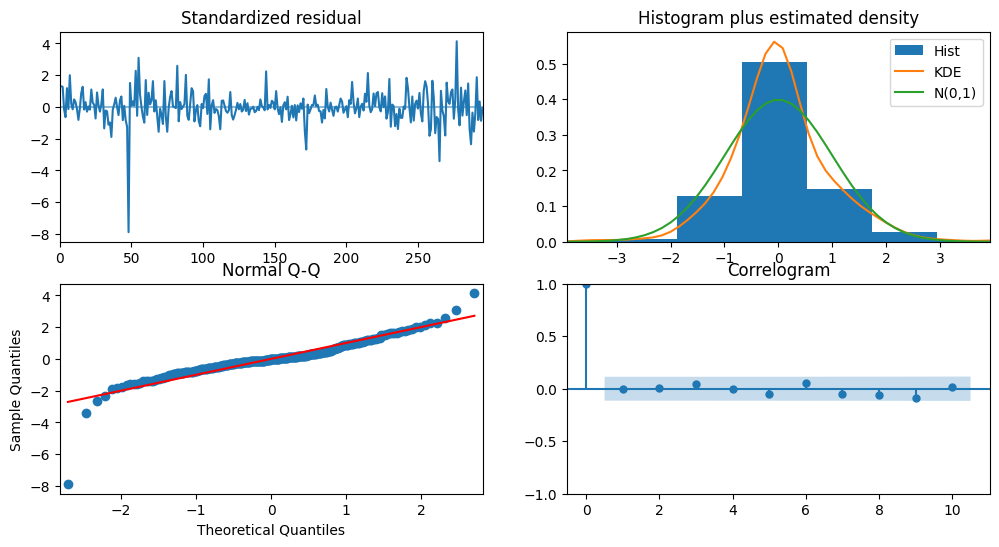

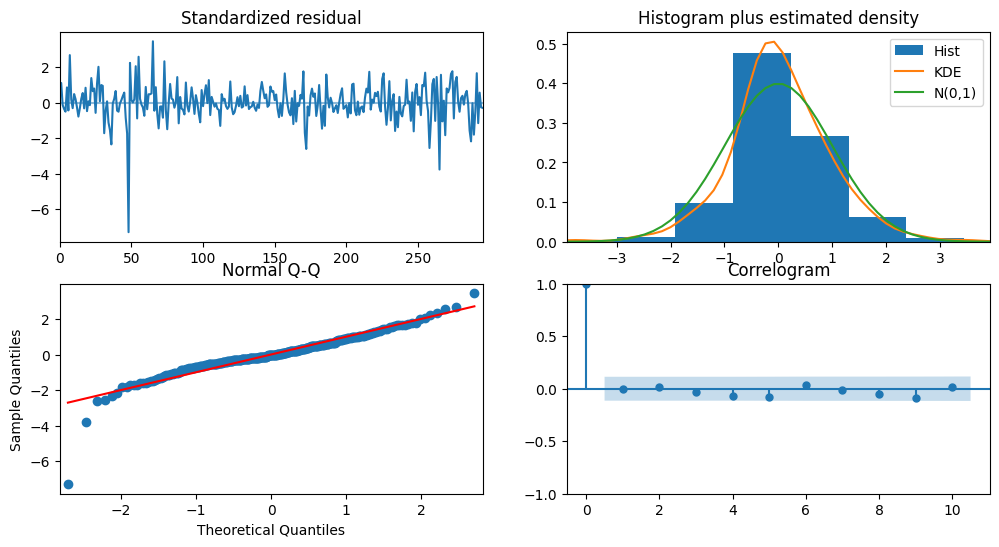

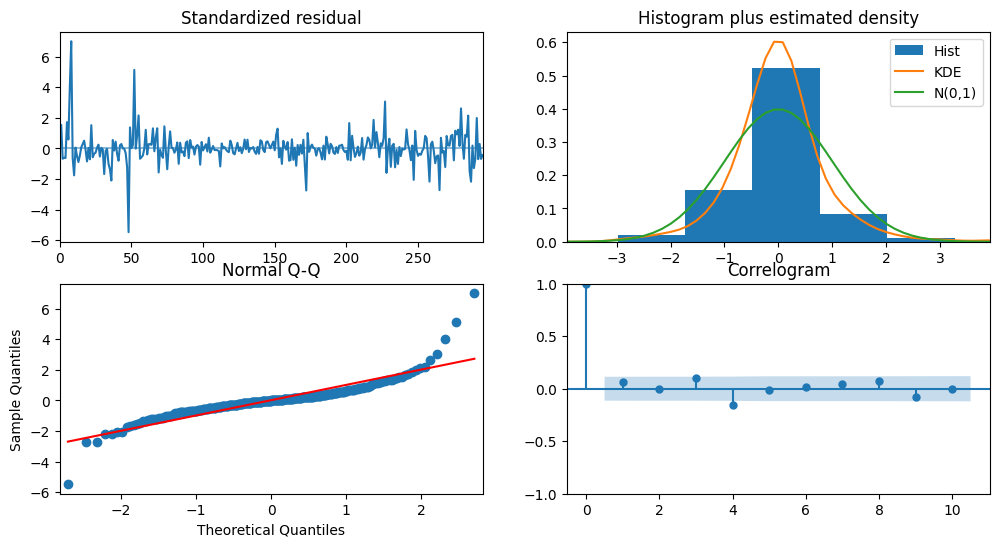

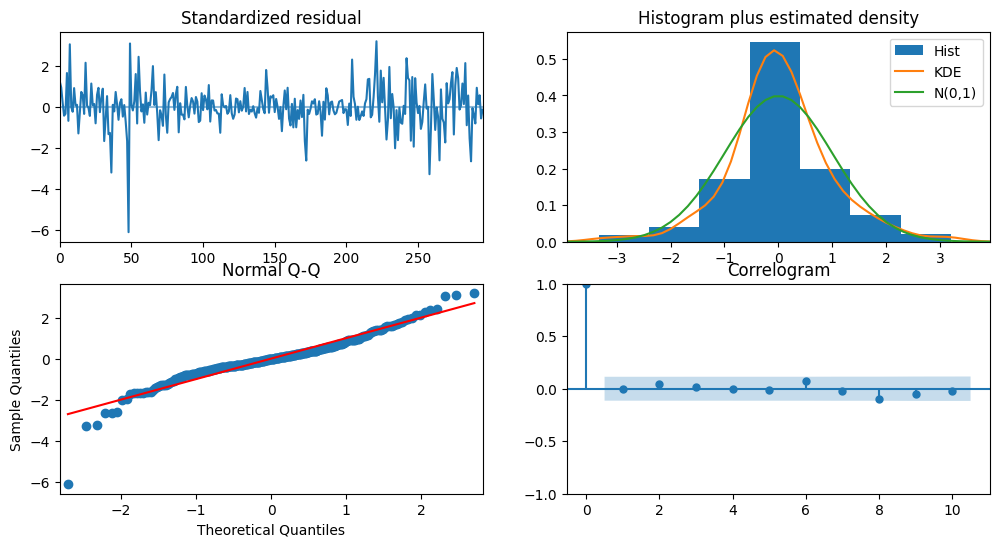

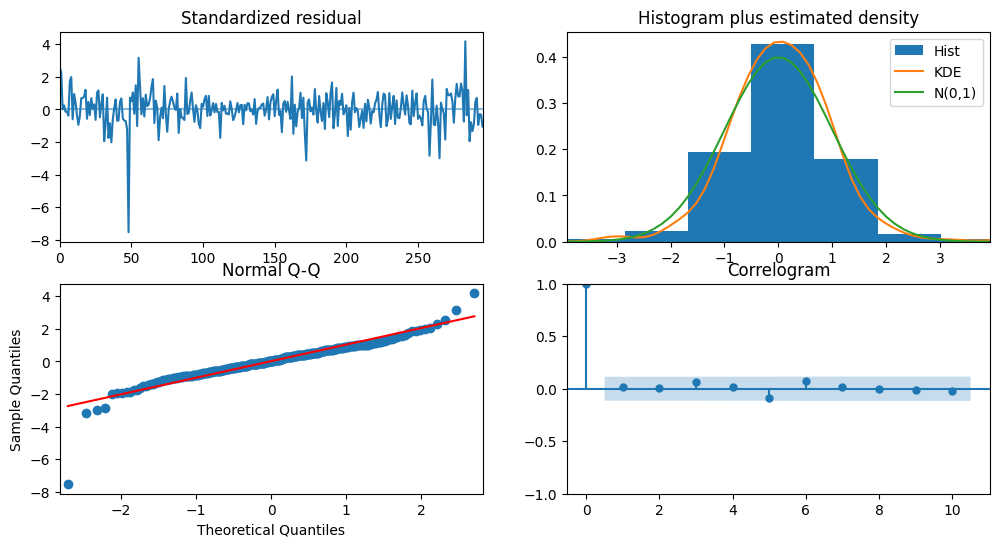

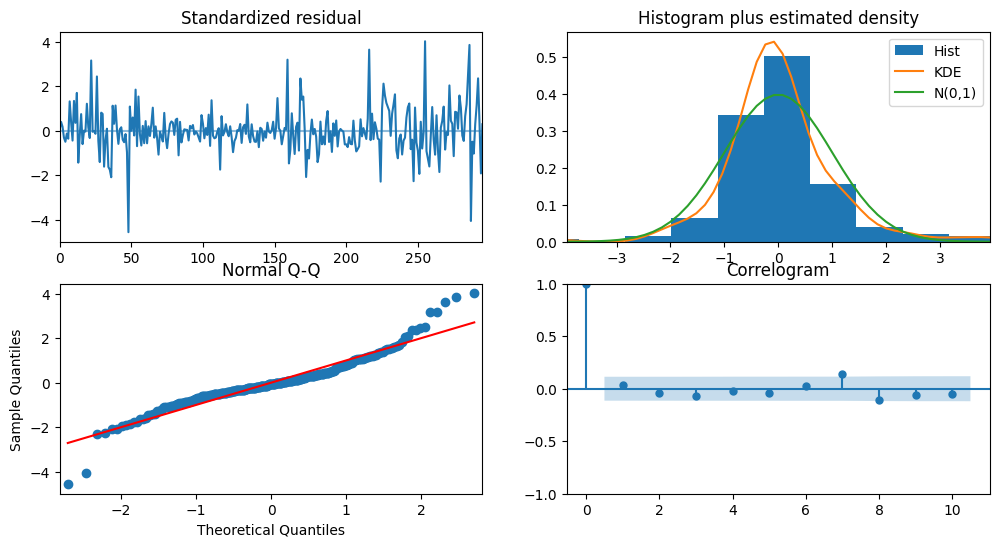

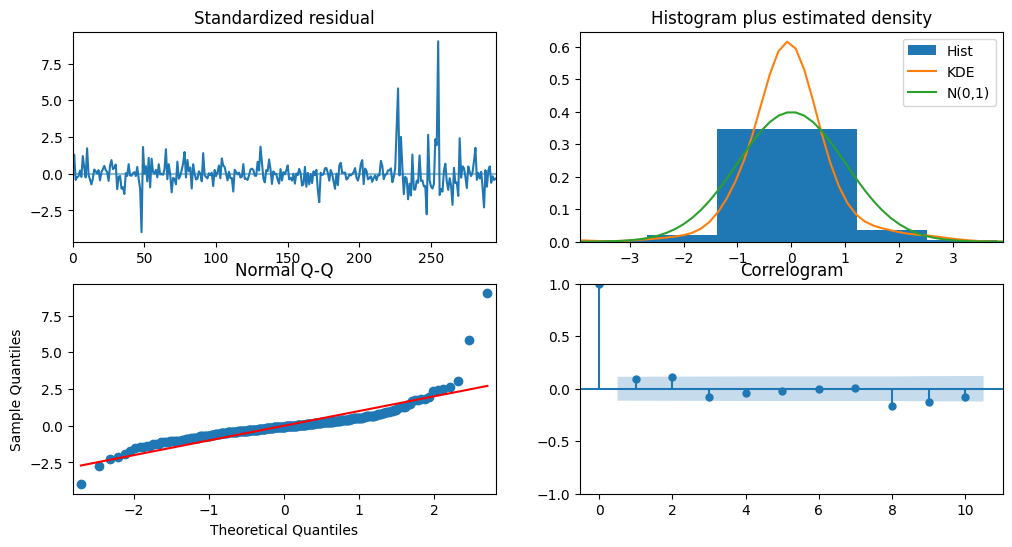

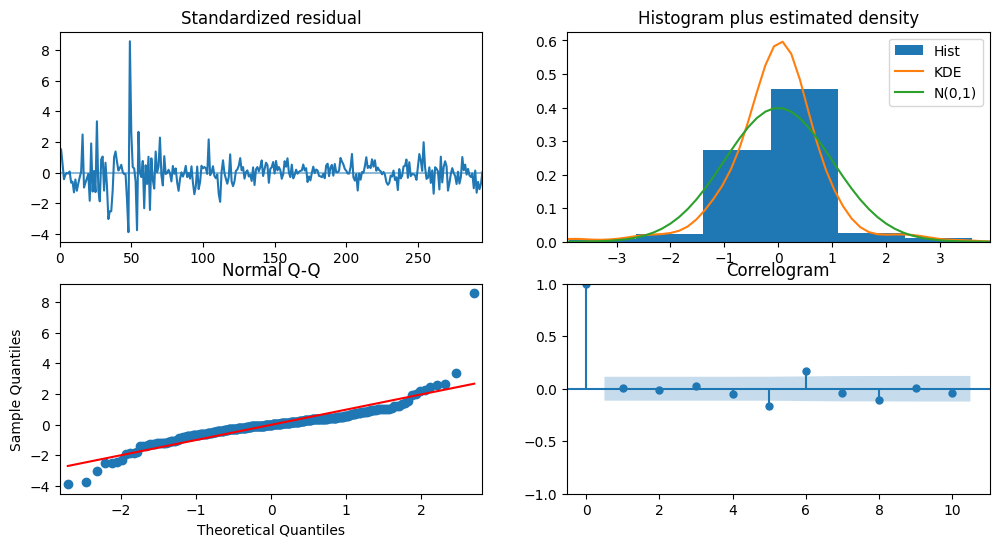

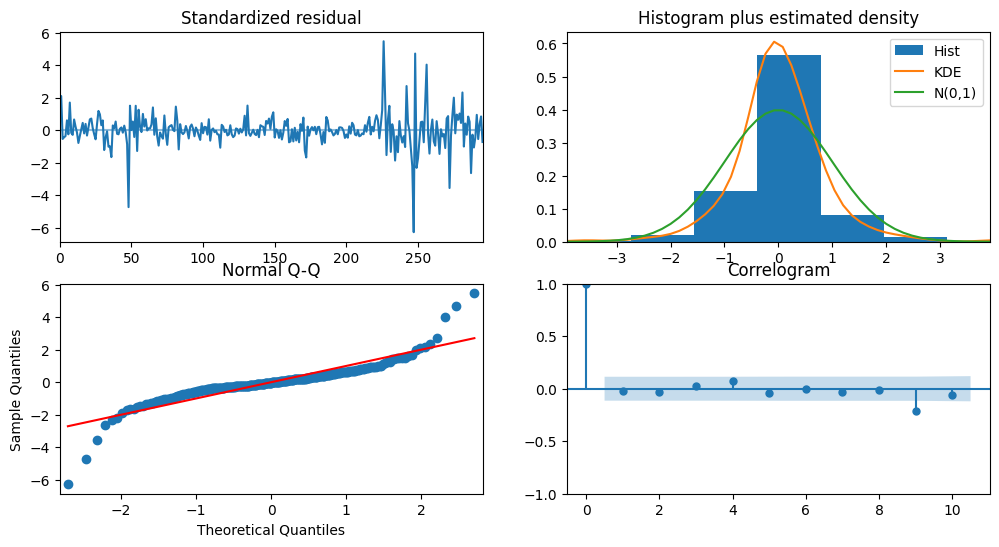

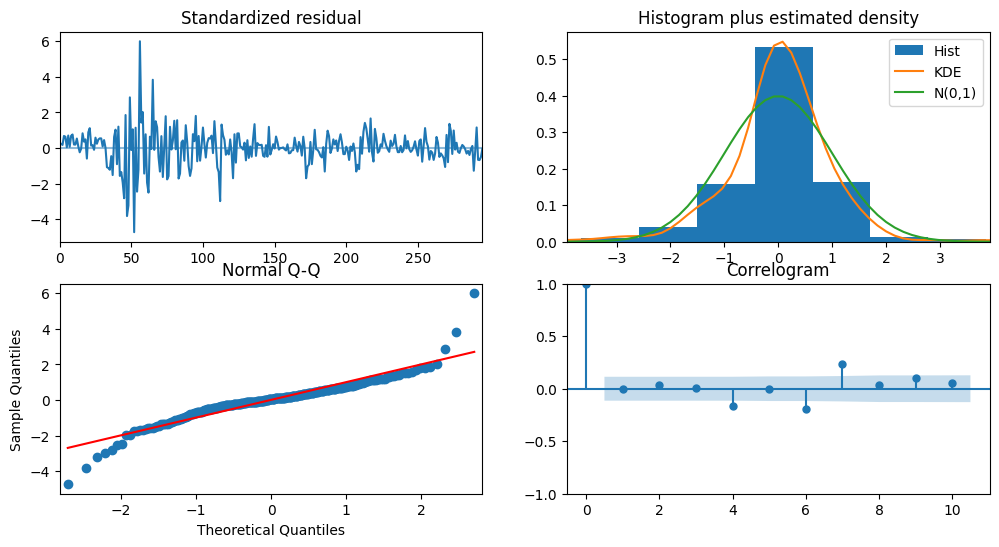

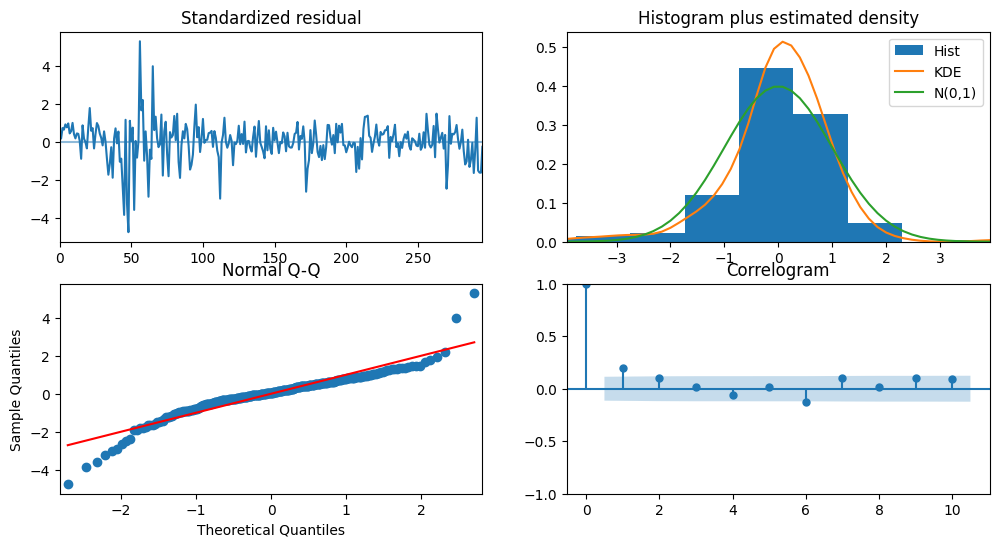

In [24]:
parameters = pd.DataFrame()
pvals = pd.DataFrame()
# Running the auto_arima
for column in y.columns:
	auto_model = pm.auto_arima(
		y = y[column], 
		start_P=0,
		start_Q=0,
		max_P=5,
		max_Q=5,
		start_p=0,
		start_q=0,
		max_p=5,
		max_q=5,
		max_order=None,
		trace=True
	)
	auto_model.fit(y[column], X)
	display(auto_model.summary())
	auto_model.plot_diagnostics(figsize=(12,6))
	params = auto_model.get_params()
	parameters[column] = auto_model.params()
	pvals[column] = auto_model.pvalues()

In [40]:
from tabulate import tabulate
parameters = parameters.fillna(0) *100
print(tabulate(parameters, headers='keys', tablefmt='psql'))

+--------+--------------+--------------+-------------+--------------+--------------+--------------+--------------+--------------+--------------+-------------+--------------+-------------+
|        |    intercept |         EFFR |         CHI |          ISP |          DRP |        MMFPR |           FP |          DR1 |          DR2 |          SP |        ar.L1 |      sigma2 |
|--------+--------------+--------------+-------------+--------------+--------------+--------------+--------------+--------------+--------------+-------------+--------------+-------------|
| BTC    |  1.73219e+10 | -1.33516e+11 | 2.97731e+10 | -6.94191e+11 | -3.47095e+11 | -4.25228e+12 |  9.79867e+11 |  7.12435e+11 |  1.37643e+10 | 5.10387e+13 | -4.12879e+12 | 2.03264e+11 |
| ETH    |  6.55481e+09 |  3.50828e+11 | 2.49348e+10 | -5.44322e+11 | -2.72161e+11 | -8.07096e+12 |  4.9699e+11  |  3.419e+12   |  8.55496e+09 | 5.15345e+13 | -5.31797e+12 | 3.11754e+11 |
| DASH   |  0           |  4.39422e+11 | 4.40471e+10 | -1.21

In [26]:
parameters = parameters.transpose()
parameters

,intercept,EFFR,CHI,ISP,DRP,MMFPR,FP,DR1,DR2,SP,ar.L1,sigma2
BTC,0.017322,-0.133516,0.029773,-0.694191,-0.347095,-4.252276,0.979867,0.712435,0.013764,51.038701,-4.128790,0.203264
ETH,0.006555,0.350828,0.024935,-0.544322,-0.272161,-8.070959,0.496990,3.419005,0.008555,51.534452,-5.317969,0.311754
DASH,0.000000,0.439422,0.044047,-1.216429,-0.607765,-9.422066,-2.450397,7.191728,0.003063,31.098710,0.000000,0.468344
LTC,0.012494,0.323855,0.012109,-0.328973,-0.164486,-5.778336,1.716969,1.294410,0.009438,51.849382,-2.908774,0.320065
MONE,-0.028922,-0.087581,0.036037,-0.793061,-0.396531,-10.843717,0.168645,8.792122,-0.001870,33.965205,-8.697198,0.242353
NEM,0.009617,0.500053,0.028945,-0.342541,-0.171270,-4.072952,-1.646265,-2.295344,0.000790,32.599628,0.000000,0.407622
STL,0.016515,0.146837,0.034162,-0.957593,-0.478796,-6.643178,0.314189,-5.892776,0.030878,39.041401,0.000000,0.638418
TETH,0.000000,0.006497,0.000347,-0.010087,-0.005044,0.854563,0.020971,0.095689,0.000050,1.802275,0.000000,0.000149
XRP,0.000000,0.084847,0.025339,-0.567032,-0.283088,-7.872193,1.705491,0.050359,0.004339,29.843507,0.000000,0.434028
KFTX,0.000000,-0.352430,0.004555,-0.081517,-0.040758,-11.483590,-0.937553,6.635364,-0.000671,25.646548,17.775452,0.044257


In [27]:
pvals = pvals.transpose()
pvals<0.05

,intercept,EFFR,CHI,ISP,DRP,MMFPR,FP,DR1,DR2,SP,ar.L1,sigma2
BTC,False,False,False,False,False,False,False,False,False,True,False,True
ETH,False,False,False,False,False,False,False,False,False,True,False,True
DASH,False,False,False,False,False,False,False,False,False,True,False,True
LTC,False,False,False,False,False,False,False,False,False,True,False,True
MONE,False,False,False,False,False,False,False,False,False,True,False,True
NEM,False,False,False,False,False,False,False,False,False,True,False,True
STL,False,False,False,False,False,False,False,False,False,True,False,True
TETH,False,False,False,False,False,True,False,False,False,True,False,True
XRP,False,False,False,False,False,False,False,False,False,True,False,True
KFTX,False,False,False,False,False,False,False,False,False,True,False,True


In [28]:
# Redo analysis without S&P

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-969.092, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-975.855, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-974.849, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-962.315, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-974.501, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-974.311, Time=0.27 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-972.757, Time=0.41 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-965.953, Time=0.04 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.309 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  296
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 493.026
Date:                Fri, 03 Mar 2023   AIC                           -964.051
Time:                        12:03:45   BIC                           -923.457
Sample:                             0   HQIC                          -947.798
                                - 296                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0002      0.061      0.003      0.997      -0.120       0.120
EFFR          -0.0003      0.030     -0.011      0.991      -0.059       0.058
CHI            0.0004      0.001      0.480      0.631      -0.001       0.002
ISP           -0.0096      0.005     -1.811      0.070      -0.020       0.001
DRP           -0.0048      0.003     -1.811      0.070      -0.010       0.000
MMFPR         -0.0757      0.088     -0.864      0.387      -0.248       0.096
FP             0.0151      0.250      0.060      0.952      -0.475       0.505
DR1            0.0279      0.126      0.221      0.825      -0.219       0.274
DR2            0.0001   9.85e-05      1.370      0.171   -5.81e-05       0.000
ar.L1         -0.1595      0.052     -3.052      0.002      -0.262      -0.057
sigma2         0.0021   9.17e-05     22.794      0.000       0.002       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              5267.15
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                            -1.99
Prob(H) (two-sided):                  0.10   Kurtosis:                        23.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.59e+18. Standard errors may be unstable.
"""

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-848.497, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-856.140, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-854.990, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-844.494, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-855.200, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-855.199, Time=0.20 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-853.249, Time=0.37 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-849.765, Time=0.05 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.020 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  296
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 432.127
Date:                Fri, 03 Mar 2023   AIC                           -842.254
Time:                        12:03:47   BIC                           -801.660
Sample:                             0   HQIC                          -826.001
                                - 296                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9.006e-05      0.069      0.001      0.999      -0.136       0.136
EFFR           0.0045      0.033      0.139      0.889      -0.059       0.068
CHI            0.0003      0.001      0.365      0.715      -0.001       0.002
ISP           -0.0081      0.007     -1.137      0.255      -0.022       0.006
DRP           -0.0041      0.004     -1.137      0.255      -0.011       0.003
MMFPR         -0.1143      0.099     -1.155      0.248      -0.308       0.080
FP             0.0103      0.313      0.033      0.974      -0.603       0.624
DR1            0.0551      0.157      0.350      0.726      -0.253       0.364
DR2         8.268e-05      0.000      0.692      0.489      -0.000       0.000
ar.L1         -0.1532      0.045     -3.402      0.001      -0.241      -0.065
sigma2         0.0032      0.000     23.446      0.000       0.003       0.003
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2817.19
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.64   Skew:                            -1.77
Prob(H) (two-sided):                  0.03   Kurtosis:                        17.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.06e+18. Standard errors may be unstable.
"""

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-736.231, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-734.512, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-734.508, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-736.464, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-732.509, Time=0.13 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.580 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  296
Model:                        SARIMAX   Log Likelihood                 372.486
Date:                Fri, 03 Mar 2023   AIC                           -726.973
Time:                        12:03:48   BIC                           -693.760
Sample:                             0   HQIC                          -713.675
                                - 296                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
EFFR           0.0050      0.005      1.018      0.309      -0.005       0.015
CHI            0.0005      0.000      1.950      0.051   -2.43e-06       0.001
ISP           -0.0138      0.008     -1.832      0.067      -0.029       0.001
DRP           -0.0069      0.004     -1.830      0.067      -0.014       0.000
MMFPR         -0.1145      4.103     -0.028      0.978      -8.155       7.926
FP            -0.0213     19.526     -0.001      0.999     -38.291      38.248
DR1            0.0845      0.273      0.310      0.757      -0.451       0.620
DR2         2.886e-05      0.000      0.147      0.883      -0.000       0.000
sigma2         0.0047      0.000     30.994      0.000       0.004       0.005
===================================================================================
Ljung-Box (L1) (Q):                   0.40   Jarque-Bera (JB):              2322.53
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):               0.49   Skew:                             1.05
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.95e+19. Standard errors may be unstable.
"""

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-842.293, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-846.759, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-845.889, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-841.753, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-846.083, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-845.786, Time=0.20 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-844.154, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-845.410, Time=0.09 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.916 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  296
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 426.912
Date:                Fri, 03 Mar 2023   AIC                           -831.823
Time:                        12:03:50   BIC                           -791.229
Sample:                             0   HQIC                          -815.570
                                - 296                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0002      0.067      0.002      0.998      -0.130       0.131
EFFR           0.0043      0.034      0.127      0.899      -0.062       0.070
CHI            0.0002      0.001      0.238      0.812      -0.001       0.002
ISP           -0.0060      0.008     -0.758      0.449      -0.021       0.010
DRP           -0.0030      0.004     -0.758      0.449      -0.011       0.005
MMFPR         -0.0915      0.111     -0.822      0.411      -0.310       0.127
FP             0.0225      0.341      0.066      0.947      -0.647       0.692
DR1            0.0340      0.182      0.187      0.852      -0.323       0.391
DR2         9.079e-05      0.000      0.726      0.468      -0.000       0.000
ar.L1         -0.1191      0.042     -2.831      0.005      -0.202      -0.037
sigma2         0.0033      0.000     20.731      0.000       0.003       0.004
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               945.77
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                            -0.95
Prob(H) (two-sided):                  0.97   Kurtosis:                        11.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.9e+20. Standard errors may be unstable.
"""

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-914.565, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-921.295, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-919.538, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-913.266, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-922.632, Time=0.24 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-921.859, Time=0.19 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-921.433, Time=0.45 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-921.352, Time=0.24 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-919.881, Time=0.30 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-920.957, Time=0.15 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 1.898 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  296
Model:               SARIMAX(2, 0, 0)   Log Likelihood                 465.895
Date:                Fri, 03 Mar 2023   AIC                           -907.790
Time:                        12:03:52   BIC                           -863.506
Sample:                             0   HQIC                          -890.060
                                - 296                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0003      0.056     -0.005      0.996      -0.110       0.110
EFFR          -0.0002      0.029     -0.007      0.994      -0.056       0.056
CHI            0.0004      0.001      0.549      0.583      -0.001       0.002
ISP           -0.0097      0.006     -1.713      0.087      -0.021       0.001
DRP           -0.0048      0.003     -1.713      0.087      -0.010       0.001
MMFPR         -0.1305      0.077     -1.698      0.089      -0.281       0.020
FP             0.0052      0.197      0.026      0.979      -0.381       0.391
DR1            0.1017      0.148      0.686      0.493      -0.189       0.392
DR2        -2.058e-05      0.000     -0.182      0.855      -0.000       0.000
ar.L1         -0.1557      0.064     -2.433      0.015      -0.281      -0.030
ar.L2          0.0413      0.074      0.561      0.575      -0.103       0.186
sigma2         0.0024      0.000     21.858      0.000       0.002       0.003
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):              2595.79
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.63   Skew:                            -1.62
Prob(H) (two-sided):                  0.02   Kurtosis:                        17.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.72e+17. Standard errors may be unstable.
"""

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-780.579, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-778.625, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-778.627, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-774.752, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-776.626, Time=0.15 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.377 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  296
Model:                        SARIMAX   Log Likelihood                 392.808
Date:                Fri, 03 Mar 2023   AIC                           -765.617
Time:                        12:03:53   BIC                           -728.713
Sample:                             0   HQIC                          -750.841
                                - 296                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   8.782e-05      0.082      0.001      0.999      -0.161       0.162
EFFR           0.0056      0.043      0.130      0.897      -0.079       0.091
CHI            0.0003      0.001      0.278      0.781      -0.002       0.003
ISP           -0.0051      0.010     -0.527      0.598      -0.024       0.014
DRP           -0.0026      0.005     -0.527      0.598      -0.012       0.007
MMFPR         -0.0620     86.879     -0.001      0.999    -170.341     170.218
FP            -0.0131    184.800  -7.09e-05      1.000    -362.215     362.189
DR1           -0.0097      0.202     -0.048      0.962      -0.406       0.387
DR2         6.176e-06      0.000      0.043      0.966      -0.000       0.000
sigma2         0.0041      0.000     19.693      0.000       0.004       0.005
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               247.89
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.71   Skew:                             0.20
Prob(H) (two-sided):                  0.01   Kurtosis:                         7.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.69e+23. Standard errors may be unstable.
"""

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-644.228, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-642.906, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-642.752, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-640.760, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-642.192, Time=0.47 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.742 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  296
Model:                        SARIMAX   Log Likelihood                 326.540
Date:                Fri, 03 Mar 2023   AIC                           -633.079
Time:                        12:03:54   BIC                           -596.176
Sample:                             0   HQIC                          -618.304
                                - 296                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0002      0.121      0.001      0.999      -0.237       0.237
EFFR           0.0022      0.068      0.033      0.974      -0.131       0.135
CHI            0.0004      0.002      0.244      0.807      -0.003       0.004
ISP           -0.0116      0.016     -0.718      0.473      -0.043       0.020
DRP           -0.0058      0.008     -0.718      0.473      -0.022       0.010
MMFPR         -0.0918     93.165     -0.001      0.999    -182.692     182.508
FP             0.0072    380.118   1.89e-05      1.000    -745.011     745.025
DR1           -0.0431      0.308     -0.140      0.889      -0.648       0.562
DR2            0.0003      0.000      1.558      0.119   -7.91e-05       0.001
sigma2         0.0064      0.000     27.706      0.000       0.006       0.007
===================================================================================
Ljung-Box (L1) (Q):                   0.77   Jarque-Bera (JB):              8269.38
Prob(Q):                              0.38   Prob(JB):                         0.00
Heteroskedasticity (H):               3.48   Skew:                             2.96
Prob(H) (two-sided):                  0.00   Kurtosis:                        28.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.03e+24. Standard errors may be unstable.
"""

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-3029.448, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-3031.267, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-3032.722, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3030.661, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-3032.516, Time=0.33 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-3037.354, Time=0.22 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-3035.847, Time=0.25 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-3035.668, Time=0.22 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-3033.084, Time=0.24 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-3037.893, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-3033.652, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-3036.470, Time=0.16 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-3036.332, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-3033.166, Time=0.18 sec
 ARIMA(1,0,3)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  296
Model:               SARIMAX(0, 0, 2)   Log Likelihood                1556.363
Date:                Fri, 03 Mar 2023   AIC                          -3090.726
Time:                        12:03:57   BIC                          -3050.132
Sample:                             0   HQIC                         -3074.473
                                - 296                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
EFFR           0.0001   6.49e-05      1.550      0.121   -2.66e-05       0.000
CHI         6.301e-06   3.52e-06      1.792      0.073   -5.92e-07    1.32e-05
ISP           -0.0002      0.000     -1.815      0.069      -0.000    1.55e-05
DRP        -9.734e-05   5.36e-05     -1.815      0.069      -0.000    7.75e-06
MMFPR          0.0074      0.001      5.413      0.000       0.005       0.010
FP             0.0004      0.004      0.091      0.927      -0.008       0.009
DR1            0.0017      0.002      0.689      0.491      -0.003       0.006
DR2         3.976e-07   2.59e-06      0.154      0.878   -4.68e-06    5.47e-06
ma.L1         -0.4083      0.083     -4.938      0.000      -0.570      -0.246
ma.L2         -0.0872      0.066     -1.330      0.183      -0.216       0.041
sigma2      1.612e-06   9.02e-08     17.872      0.000    1.44e-06    1.79e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             16271.37
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.12   Skew:                             3.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        38.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.22e+19. Standard errors may be unstable.
"""

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-761.229, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-760.664, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-760.670, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-761.523, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-758.670, Time=0.08 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.306 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  296
Model:                        SARIMAX   Log Likelihood                 383.784
Date:                Fri, 03 Mar 2023   AIC                           -749.569
Time:                        12:03:58   BIC                           -716.355
Sample:                             0   HQIC                          -736.271
                                - 296                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
EFFR           0.0014      0.009      0.156      0.876      -0.017       0.020
CHI            0.0003      0.000      0.799      0.424      -0.000       0.001
ISP           -0.0072      0.010     -0.691      0.489      -0.028       0.013
DRP           -0.0036      0.005     -0.690      0.490      -0.014       0.007
MMFPR         -0.0981      4.026     -0.024      0.981      -7.989       7.793
FP             0.0201     25.133      0.001      0.999     -49.239      49.279
DR1            0.0126      0.261      0.048      0.961      -0.499       0.524
DR2         4.374e-05      0.000      0.304      0.761      -0.000       0.000
sigma2         0.0044      0.000     29.675      0.000       0.004       0.005
===================================================================================
Ljung-Box (L1) (Q):                   0.89   Jarque-Bera (JB):              1702.26
Prob(Q):                              0.35   Prob(JB):                         0.00
Heteroskedasticity (H):               2.95   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.81e+19. Standard errors may be unstable.
"""

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1388.240, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1402.824, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1397.599, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1389.836, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1413.220, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-1414.460, Time=0.11 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-1424.376, Time=0.11 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-1422.978, Time=0.77 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-1422.045, Time=0.12 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1429.814, Time=0.66 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1412.323, Time=0.71 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1431.701, Time=0.61 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1416.380, Time=0.74 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-1426.972, Time=0.94 sec
 ARIMA(3,0,3)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  296
Model:               SARIMAX(3, 0, 2)   Log Likelihood                 716.492
Date:                Fri, 03 Mar 2023   AIC                          -1404.984
Time:                        12:04:11   BIC                          -1353.319
Sample:                             0   HQIC                         -1384.299
                                - 296                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
EFFR          -0.0030      0.003     -0.968      0.333      -0.009       0.003
CHI         8.611e-05      0.000      0.724      0.469      -0.000       0.000
ISP           -0.0022      0.003     -0.682      0.495      -0.008       0.004
DRP           -0.0011      0.002     -0.682      0.495      -0.004       0.002
MMFPR         -0.1315      0.025     -5.198      0.000      -0.181      -0.082
FP            -0.0067      0.427     -0.016      0.987      -0.843       0.830
DR1            0.0768      0.053      1.440      0.150      -0.028       0.181
DR2        -4.248e-06   7.86e-05     -0.054      0.957      -0.000       0.000
ar.L1         -0.1275      0.867     -0.147      0.883      -1.827       1.571
ar.L2          0.6839      0.540      1.266      0.206      -0.375       1.743
ar.L3          0.1029      0.140      0.733      0.464      -0.172       0.378
ma.L1         -0.0161      0.853     -0.019      0.985      -1.688       1.655
ma.L2         -0.6299      0.569     -1.107      0.268      -1.746       0.486
sigma2         0.0005   2.55e-05     17.977      0.000       0.000       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               464.69
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.15   Skew:                            -0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.1e+17. Standard errors may be unstable.
"""

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1506.364, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1504.479, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1504.442, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1506.826, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1502.506, Time=0.17 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.526 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  296
Model:                        SARIMAX   Log Likelihood                 770.932
Date:                Fri, 03 Mar 2023   AIC                          -1523.864
Time:                        12:04:12   BIC                          -1490.651
Sample:                             0   HQIC                         -1510.566
                                - 296                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
EFFR          -0.0040      0.002     -1.839      0.066      -0.008       0.000
CHI         8.115e-05   5.17e-05      1.570      0.116   -2.01e-05       0.000
ISP           -0.0017      0.002     -1.091      0.275      -0.005       0.001
DRP           -0.0009      0.001     -1.086      0.278      -0.002       0.001
MMFPR         -0.0915      0.342     -0.268      0.789      -0.762       0.579
FP            -0.0048     12.352     -0.000      1.000     -24.214      24.204
DR1            0.0507      0.049      1.044      0.297      -0.045       0.146
DR2         1.222e-05   5.47e-05      0.223      0.823   -9.49e-05       0.000
sigma2         0.0003   1.46e-05     21.788      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):               576.13
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.27   Skew:                            -0.66
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.56e+20. Standard errors may be unstable.
"""

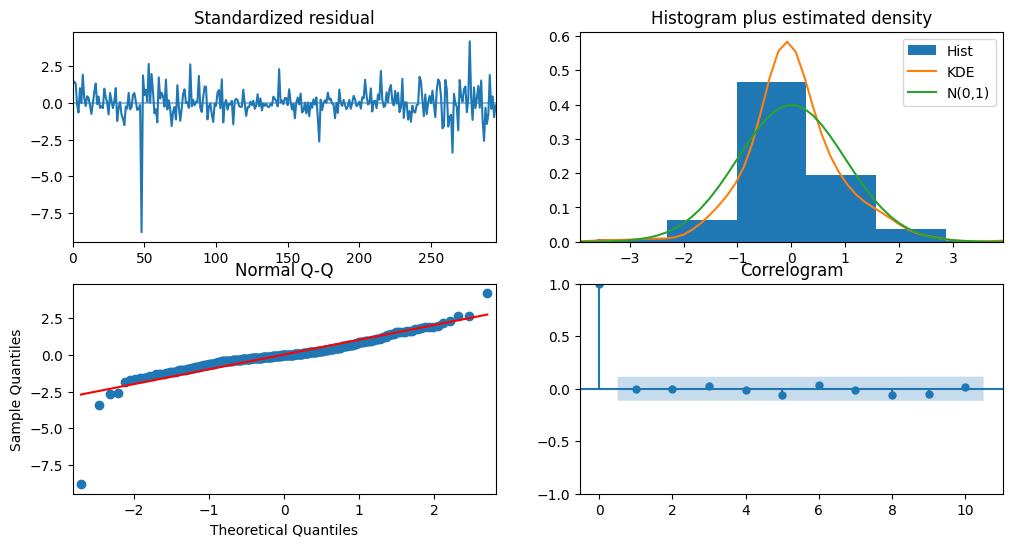

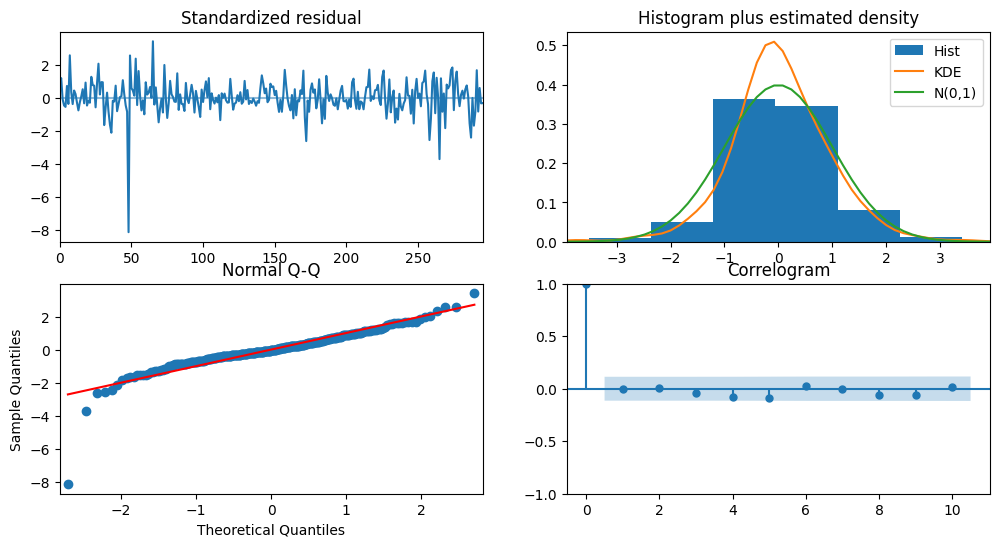

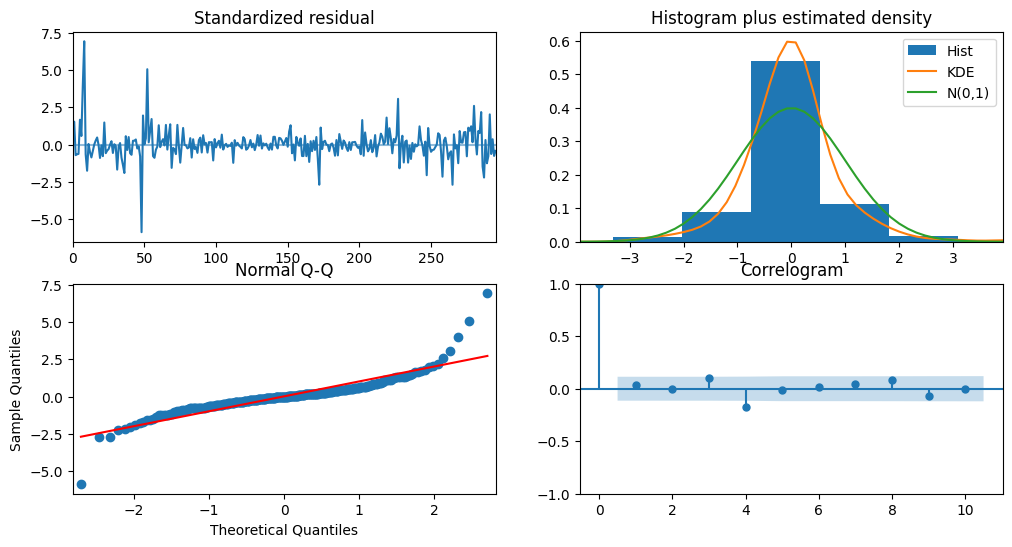

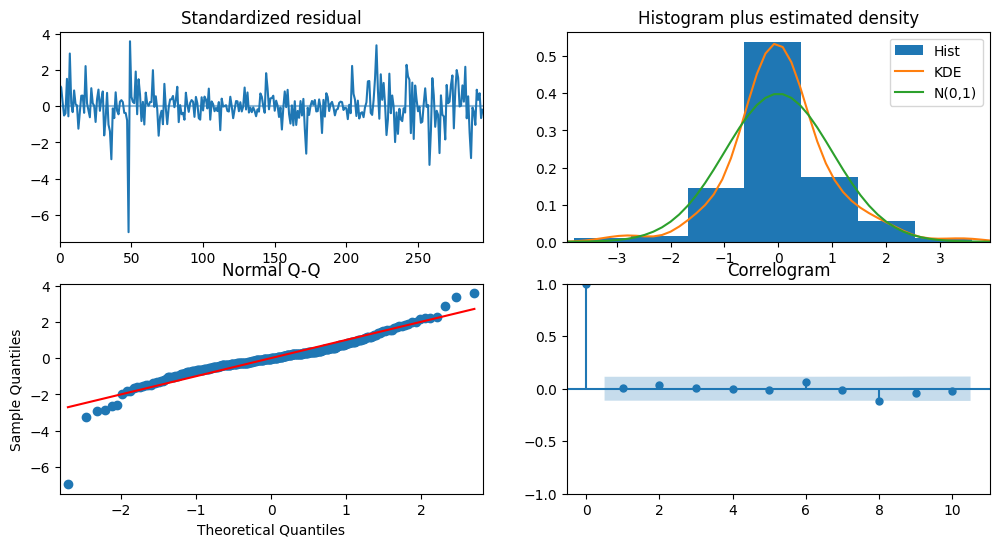

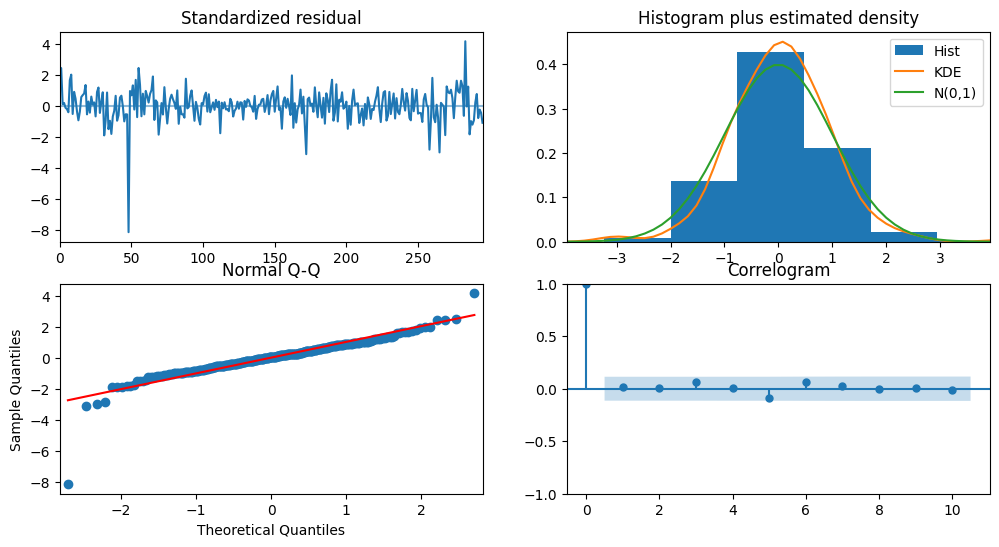

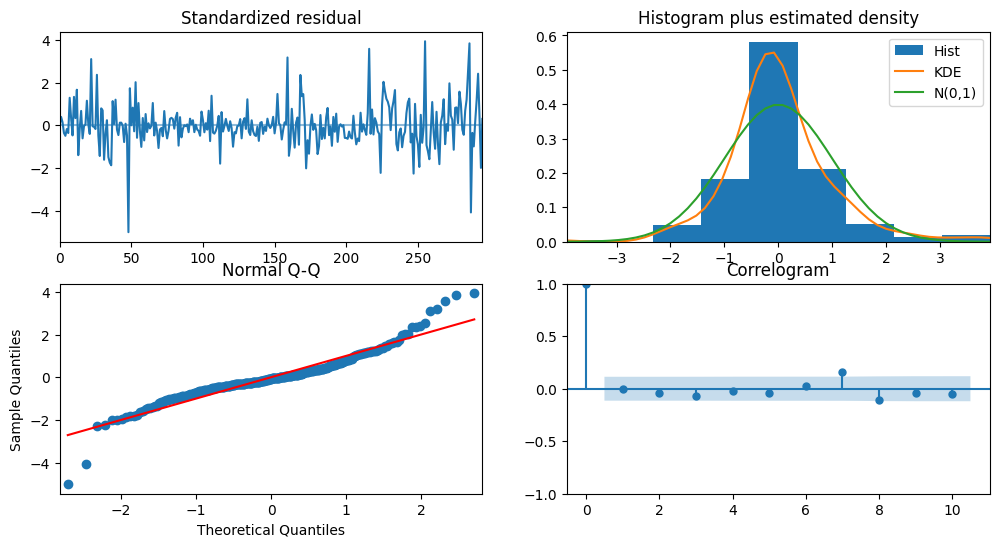

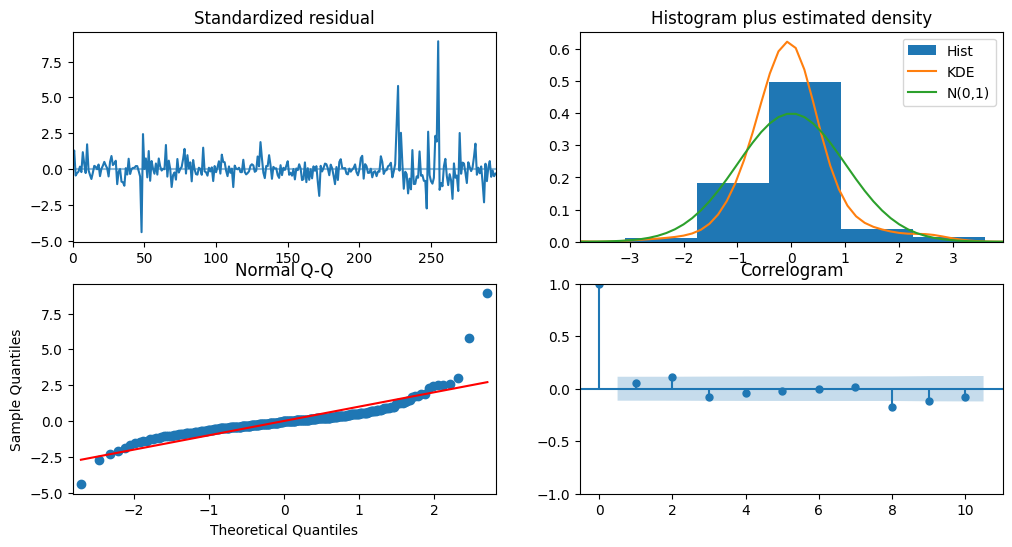

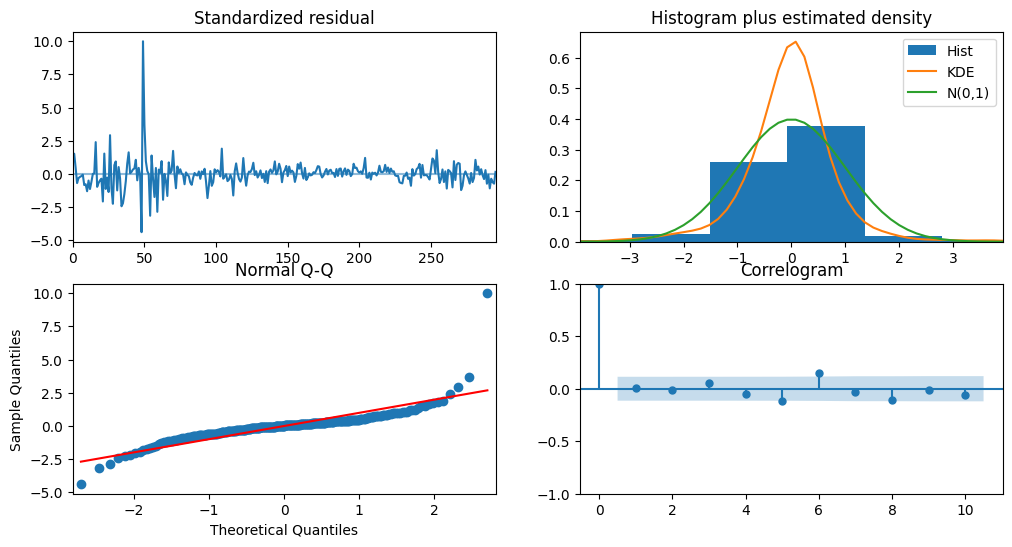

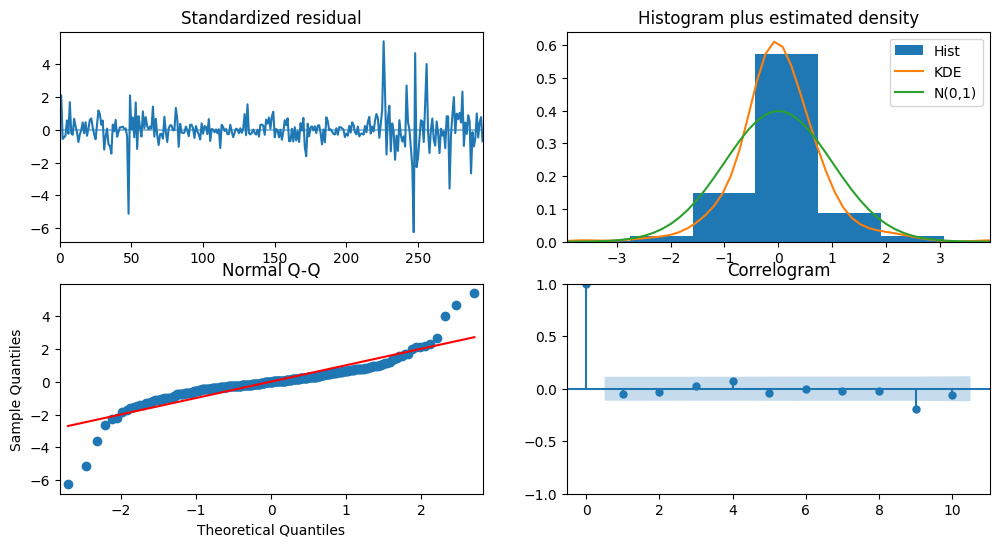

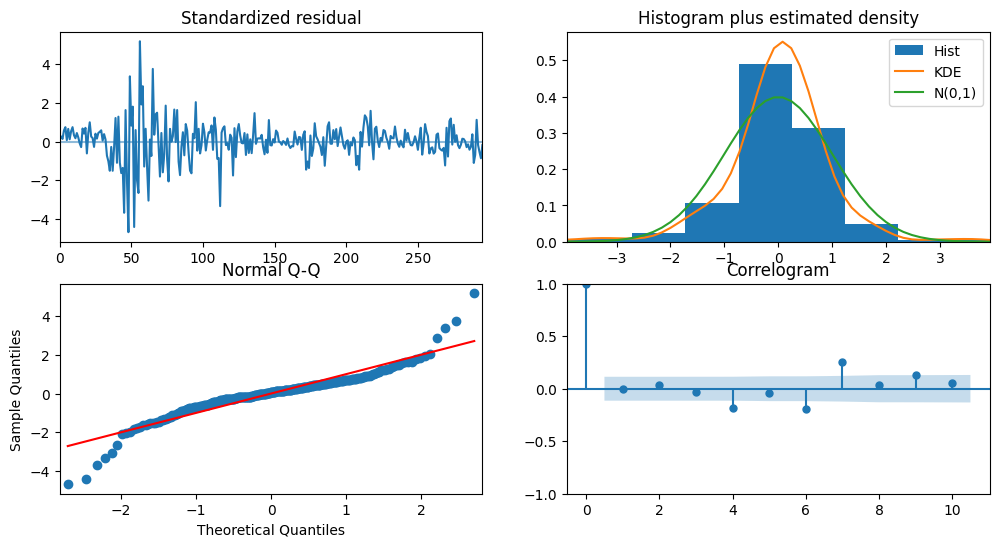

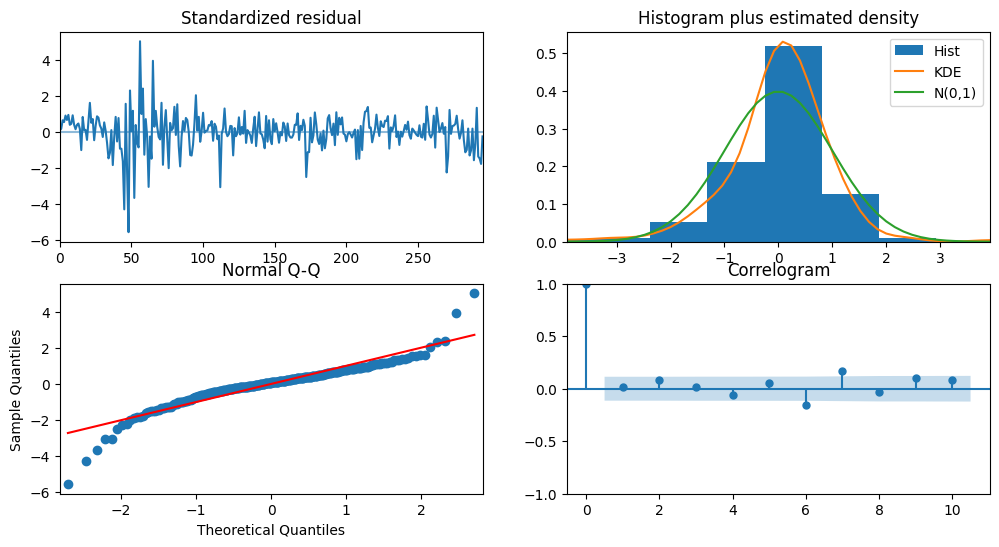

In [29]:
parameters2 = pd.DataFrame()
pvals2 = pd.DataFrame()
X2 = X.drop("SP", axis = 1)
# Running the auto_arima
for column in y.columns:
	auto_model = pm.auto_arima(
		y = y[column], 
		start_P=0,
		start_Q=0,
		max_P=5,
		max_Q=5,
		start_p=0,
		start_q=0,
		max_p=5,
		max_q=5,
		max_order=None,
		trace=True
	)
	auto_model.fit(y[column], X2)
	display(auto_model.summary())
	auto_model.plot_diagnostics(figsize=(12,6))
	params = auto_model.get_params()
	parameters2[column] = auto_model.params()
	pvals2[column] = auto_model.pvalues()

In [30]:
parameters2 = parameters.fillna(0) * 100
parameters2.transpose()

,BTC,ETH,DASH,LTC,MONE,NEM,STL,TETH,XRP,KFTX,NQROBO
intercept,1.732191,0.655481,0.000000,1.249442,-2.892185,0.961722,1.651537,0.000000,0.000000,0.000000,0.000000
EFFR,-13.351632,35.082801,43.942190,32.385508,-8.758115,50.005288,14.683733,0.649686,8.484702,-35.243018,-43.191514
CHI,2.977311,2.493485,4.404706,1.210926,3.603672,2.894461,3.416169,0.034695,2.533927,0.455456,0.559256
ISP,-69.419082,-54.432187,-121.642879,-32.897260,-79.306100,-34.254092,-95.759272,-1.008717,-56.703167,-8.151712,-9.218202
DRP,-34.709537,-27.216092,-60.776528,-16.448627,-39.653050,-17.127044,-47.879632,-0.504359,-28.308766,-4.075808,-4.571012
MMFPR,-425.227626,-807.095936,-942.206584,-577.833579,-1084.371744,-407.295209,-664.317795,85.456283,-787.219273,-1148.359026,-807.042654
FP,97.986694,49.698958,-245.039735,171.696907,16.864532,-164.626478,31.418948,2.097095,170.549145,-93.755313,-65.464331
DR1,71.243499,341.900494,719.172753,129.440996,879.212196,-229.534353,-589.277605,9.568921,5.035901,663.536417,439.756248
DR2,1.376429,0.855496,0.306291,0.943765,-0.186995,0.079009,3.087788,0.004976,0.433915,-0.067147,0.115113
SP,5103.870085,5153.445177,3109.870997,5184.938244,3396.520544,3259.962771,3904.140056,180.227547,2984.350700,2564.654829,1663.007109


In [31]:
pvals2 = pvals2.transpose()
pvals2<0.05

,intercept,EFFR,CHI,ISP,DRP,MMFPR,FP,DR1,DR2,ar.L1,sigma2
BTC,False,False,False,False,False,False,False,False,False,True,True
ETH,False,False,False,False,False,False,False,False,False,True,True
DASH,False,False,False,False,False,False,False,False,False,False,True
LTC,False,False,False,False,False,False,False,False,False,True,True
MONE,False,False,False,False,False,False,False,False,False,True,True
NEM,False,False,False,False,False,False,False,False,False,False,True
STL,False,False,False,False,False,False,False,False,False,False,True
TETH,False,False,False,False,False,True,False,False,False,False,True
XRP,False,False,False,False,False,False,False,False,False,False,True
KFTX,False,False,False,False,False,True,False,False,False,False,True
